## Paper : Dueling Network Architectures for Deep Reinforcement Learning

### Main Focus

Moving away from the research work done for improving RL algorithms using the conventional NN architecture,CNNs,MLPs,LSTM or auto-encoder this work focuses on implementing a new neural network architecture itself called Dueling architecture.

Two separate estimators- 

1) state-value function
2) state-dependent action advantage function

The idea comes from the fact that for many states , it is unneccessary to estimate the value of each action choice , for instance,in the enduro Atari 2600 game (kind of moto gp) , knowing whether to move left or move right only matters when the collision is eminent. So in some states it is of paramount importance to know whcih action to take, but in many others the choice of action has no repercussion on what happens.

Goal : Focus on revamping the neural net architecture for better policy evaluation in presence of several similar valued actions and specially for model-free RL.

### Related Literature

- It uses Double DQN from the DDQN paper by Van hasselt et al., 2015
- Also uses the concept of PER (Prioritized experience replay) introduced in Schaul et al, 2016

### Architecture Details

- The lower layers of the dueling network are convolutional as in the original DQNs.However, instead of following the convolutional layers with a single sequence of fully connected layers, we instead use two sequences (or streams) of fully connected layers. 
- The Dueling architecture consists of consists of two streams that represent the value and advantage functions while sharing a common convolutional feature learning module

- The two streams are combined via a special aggregating layer to produce an estimate of the state-action value function Q
- The advantage expression is given by , 
\begin{equation}
       \mathcal{A}^{\pi}(s,a) = \mathcal{Q}^{\pi}(s,a) - \mathcal{V}^{\pi}(s)
\end{equation}       

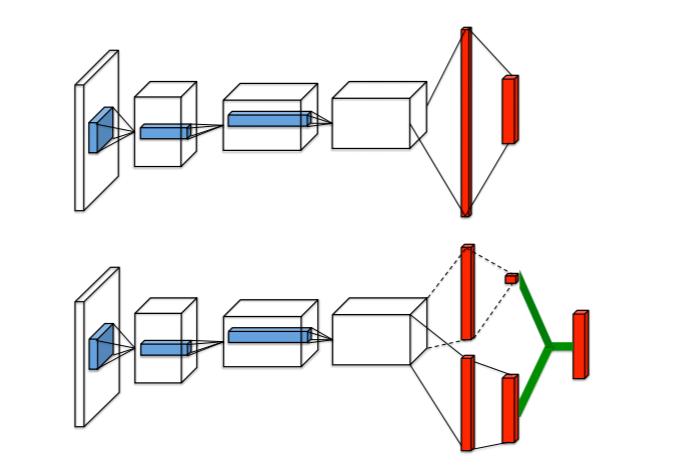

In [3]:
from IPython.display import Image
Image(filename='DDQN.png')

- One stream of fully-connected layer outputs - $\mathcal{V}(s;\theta,\beta$
- Other stream output $|A|$ dimensional vector $\mathcal{A}(s,a,\theta,\alpha)$

here,$\theta$ is the paramters of the CNN and $\alpha, \beta$ are the paramters of the two streams of fully-connected layer

The DDQN Setup of van Hasselt et al. is followed incorporated with rank-based PER. The hyperparameters and optimizers are also adopted from DDQN work, with an exception of slightly lower learning rate from DDQN.

Important Hacks Used:
- To increse stability in the split case , the combined gradient entering the last convolutional layer i srescaled by $1/\sqrt{2}$
- To block the norm to less than or equal to 10 the concept of *clipping* is used (common in recurrent network training ;not common in RL)
- The paper used the concpet of gradient clipping to DDQN withoit split , and demonstrated improved results from simple *single DDQN* ,indicating that **gradient clipping is a very good approach**.
- Concept of Human starts , wherein the work used 100 different starting points , and for each point an evalaution epsiode is launched for up to 10800 frame. This prevents any misleading performance metric values. As the Atari env is deterministic , from an unqiue starting point , an agent can learn to achieve good performance by simply remembering sequences of actions , which would not be a robut measure. 

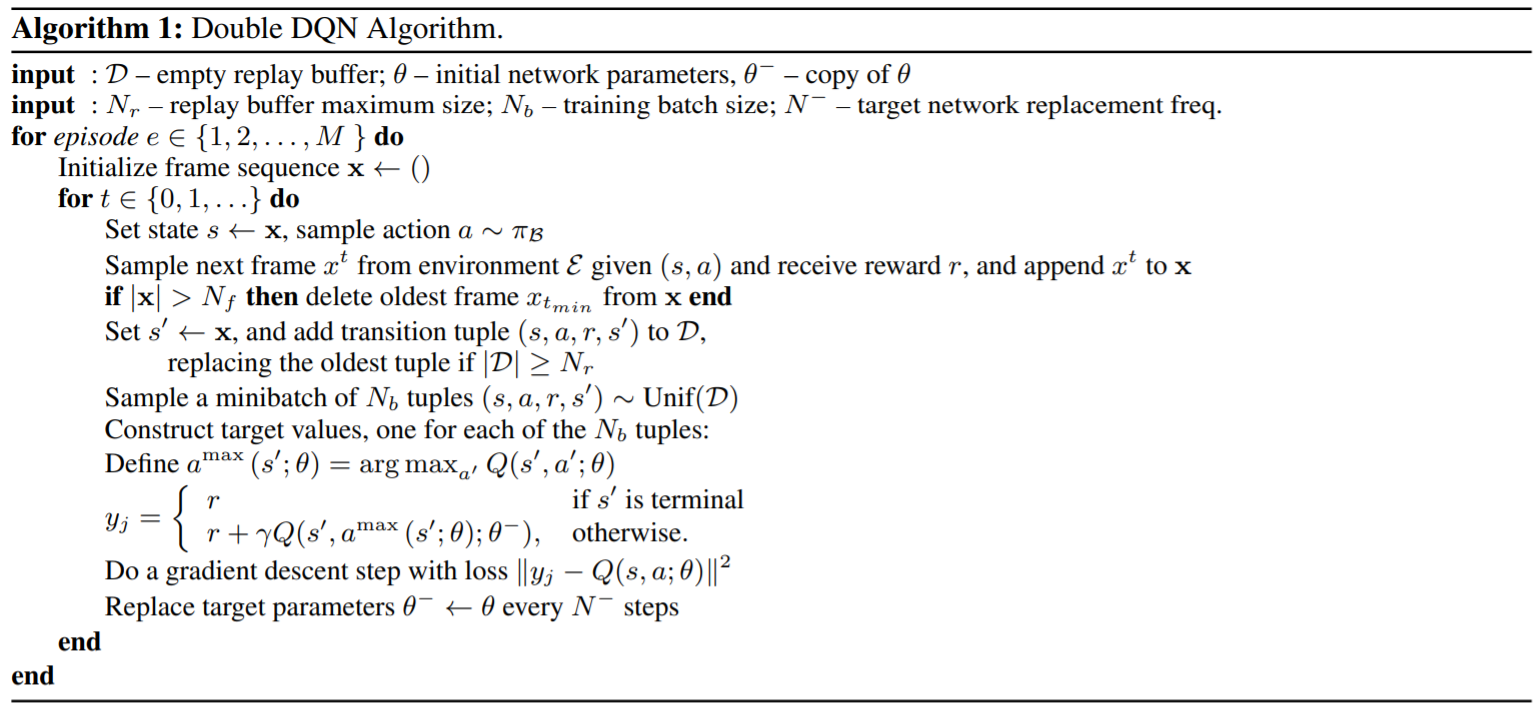

In [2]:
from IPython.display import Image
Image(filename='DDQN3.png')

### Improvements

- Comaprison of dueling architecture is done with single-stream Q-architecture
- Single-stream architecture $\rightarrow$ 3-layer MLP with 50 hidden units
- The dueling arhcitecture is composed of 3 layers MLP , 50 hidden layer $\rightarrow$ two streams $\rightarrow$ each with two layer MLP with 25 hidden units

Both the architectures converge at about the same speed. As no. of actions increase, dueling performs better as the state-value-function $\mathcal{V}(s;\theta;\beta)$ learns a general value that is shared across many similar actions at $\mathcal{s}$ hence leading to faster convergence.

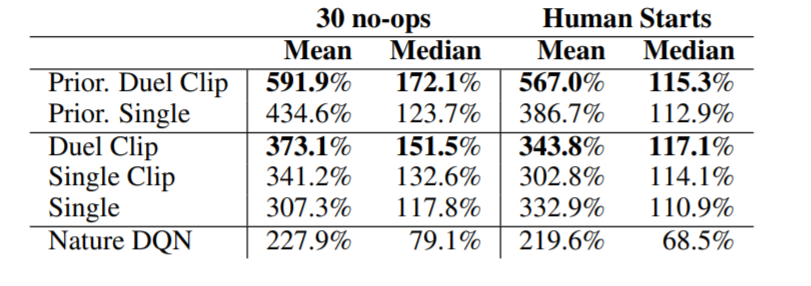

In [4]:
from IPython.display import Image
Image(filename='DDQN2.png')

Here, prior Duel clip is the Dueling architectiure(two-splits) with PER and gradient clipping , Prior. single - PER with DDQN (no-split) , followed by Simple Dueling architeture with gradient clipping , Duel clip and single clip (DDQN with gradient clipping). Nature DQN is the DQN algo 